# CKKS-basic #1
# Coeff Encode/Decode

# 今回の目標

**1. cleartext と plaintext の概念を理解する**  
**2. Coeff 方式による encode アルゴリズムを理解する**  

# 前処理

In [1]:
import numpy as np
from numpy.polynomial import Polynomial

# Parameters

In [2]:
scale = 64

# 1. Cleartext and Plaintext

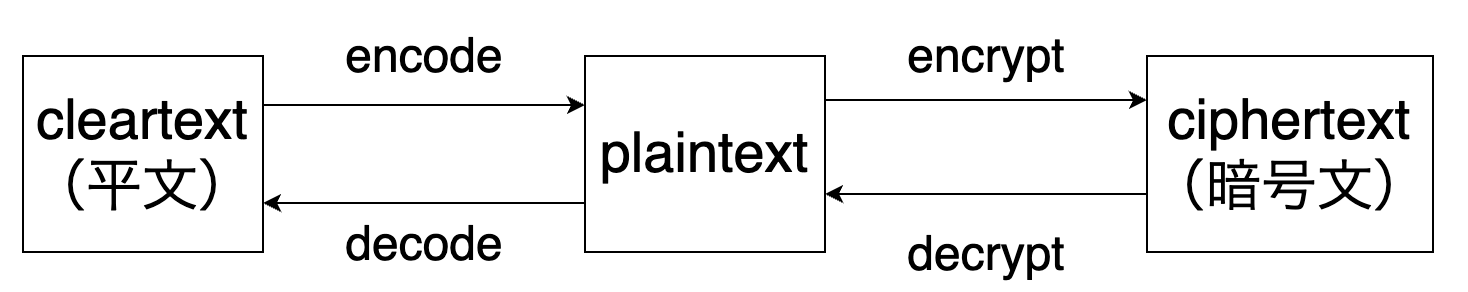

### cleartext とは？

cleartext : 俗にいうメッセージ・生データのこと  
plaintext : 「暗号化アルゴリズム」の input のこと

**日本語の「平文」だと、上記のどちらを表すかが曖昧なため、上の表現をもって明確に区別する**

Encode: cleartext から plaintext への変換アルゴリズムのこと  
Decode: plaintext から cleartext への変換アルゴリズムのこと  
    
**cleartext に対して、Encode をしてから、Decode を行うと、元の値の cleartext に戻ってくる**  
Decode(Encode(cleartext)) = cleartext

# 2. Coeff Encode

## Coeff Encode とは？

準同型暗号 CKKS 方式では、代表的な Encode 手法が2つあり、今回は Coeff 方式を説明する  

### Coeff Encode の概要   
1. 複素ベクトルの各複素数を実数成分に分解する  
1. スケーリング係数を掛けて、四捨五入をする  

### Coeff Decode の概要   
1. 多項式の各係数をスケーリング係数で割る  
1. 多項式の係数である実数の組を複素数へ戻す  

## 2.1 Coeff Encode Algorithm

In [3]:
def coeff_encode(
    z: list,
    scale: int,
) -> Polynomial:
    """Converts a complex vector into a integer coefficient polynomial."""
    coef = []

    for z_i in z:
        # Step1
        scaled_zi = scale * z_i
        
        # Step2
        coef.append(np.round(np.real(scaled_zi)).astype(int))
        coef.append(np.round(np.imag(scaled_zi)).astype(int))

    return Polynomial(coef)


def coeff_decode(
    p: Polynomial,
    scale: int,
) -> np.array:
    """Converts a integer coefficient polynomial into a complex vector."""
    """Inverse operation of coeff_encode"""
    rescaled_p = []

    for i in range(len(p.coef) // 2):
        # Step1 and Step2
        rescaled_p.append(p.coef[2 * i] / scale + 1j * (p.coef[2 * i + 1]) / scale)

    return rescaled_p

## 2.2 Coeff Encode Example

In [4]:
# メッセージを入力する
cleartext1 = [3 + 4j, 2 - 1j]
print("メッセージ1:", cleartext1)
cleartext2 = [5 - 2j, 3 + 4j]
print("メッセージ2:", cleartext2)

print()

# plaintext を生成する
plaintext1 = coeff_encode(cleartext1, scale)
print("plaintext1:", plaintext1)
plaintext2 = coeff_encode(cleartext2, scale)
print("plaintext2:", plaintext2)

print()

# plaintext を decode する
decoded_plaintext1 = coeff_decode(plaintext1, scale)
print("plaintext1 の decode 結果: ", decoded_plaintext1)
decoded_plaintext2 = coeff_decode(plaintext2, scale)
print("plaintext2 の decode 結果: ", decoded_plaintext2)

メッセージ1: [(3+4j), (2-1j)]
メッセージ2: [(5-2j), (3+4j)]

plaintext1: 192.0 + 256.0·x + 128.0·x² - 64.0·x³
plaintext2: 320.0 - 128.0·x + 192.0·x² + 256.0·x³

plaintext1 の decode 結果:  [(3+4j), (2-1j)]
plaintext2 の decode 結果:  [(5-2j), (3+4j)]


## スケーリング係数の役割

coeff_encode/coeff_decode において、scale の値を大きくすると、encode→decode を行った際の誤差が低減される

### scale = 64(= 2**6) の場合

In [5]:
scale = 64

# メッセージを入力する
cleartext = [3.14 + 4.0233j, 2.621 - 1.002j]
print("メッセージ:", cleartext)

print()

# plaintext を生成する
plaintext = coeff_encode(cleartext, scale)

# plaintext を decode する
decoded_plaintext = coeff_decode(plaintext, scale)
print("plaintext の decode 結果: ", decoded_plaintext)

メッセージ: [(3.14+4.0233j), (2.621-1.002j)]

plaintext の decode 結果:  [(3.140625+4.015625j), (2.625-1j)]


### scale = 2**20 の場合

In [6]:
scale = 2**20

# メッセージを入力する
cleartext = [3.14 + 4.0233j, 2.621 - 1.002j]
print("メッセージ:", cleartext)

print()

# plaintext を生成する
plaintext = coeff_encode(cleartext, scale)

# plaintext を decode する
decoded_plaintext = coeff_decode(plaintext, scale)
print("plaintext の decode 結果: ", decoded_plaintext)

メッセージ: [(3.14+4.0233j), (2.621-1.002j)]

plaintext の decode 結果:  [(3.140000343322754+4.0233001708984375j), (2.621000289916992-1.001999855041504j)]
